# DATA DESCRIPTION

Today I will work with the yelp reviews dataset.
Yelp is one of the largest company founded in 2004 for publishing crowd-sourced reviews about businesses, it provides one open dataset the Yelp Dataset.
This dataset contains 6,685,900 reviews, 192,609 businesses, 200,000 pictures in 10 metropolitan areas, but I use only the reviews about restaurant. In this chapter I will show some insight of the help dataset like the distribution of stars, the most common word and so on, I only use 20000 reviews due to computational constraint.
The dataset can be downloaded for free online in json format, and is divided in 5 json different dataset, I need only 2 of these, 1 with the reviews, and the other with the type of business.
I start by loading the reviews dataset and look at the head.

In [3]:
library(readr)
library(dplyr)
library(jsonlite)
library(stringr)
library(tm)
library(stopwords)
library(hunspell)
library(textstem)
infile <- "yelp_academic_dataset_review.json"
review_lines <- read_lines(infile, n_max = 200000, progress = FALSE)

In [4]:
reviews_combined <- str_c("[", str_c(review_lines, collapse = ", "), "]")

reviews <- fromJSON(reviews_combined) %>%
  flatten() %>%
  tibble::as_tibble() 
head(reviews)

review_id,user_id,business_id,stars,useful,funny,cool,text,date
<chr>,<chr>,<chr>,<dbl>,<int>,<int>,<int>,<chr>,<chr>
xQY8N_XvtGbearJ5X4QryQ,OwjRMXRC0KyPrIlcjaXeFQ,-MhfebM0QIsKt87iDN-FNw,2,5,0,0,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go! Tucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call ""cozy"" or ""charming"" - basically any euphemism for small. That being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you: * pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much. * it's not kid friendly at all. Seriously, don't bring them. * the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the art in a certain sequence, whether it be by historical period or cultural significance (this is how audio guides are usually developed). When I arrived in the gallery I could not tell where to start, and security was certainly not helpful. I was told to ""just look around"" and ""do whatever."" At such a *fine* institution, I find the lack of knowledge and respect for the art appalling.",2015-04-15 05:21:16
UmFMZ8PyXZTY2QcwzsfQYA,nIJD_7ZXHq-FX8byPMOkMQ,lbrU8StCq3yDfr-QMnGrmQ,1,1,1,0,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place. Bottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!",2013-12-07 03:16:52
LG2ZaYiOgpr2DK_90pYjNw,V34qejxNsCbcgD8C0HVk-Q,HQl28KMwrEKHqhFrrDqVNQ,5,1,0,0,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",2015-12-05 03:18:11
i6g_oA9Yf9Y31qt0wibXpw,ofKDkJKXSKZXu5xJNGiiBQ,5JxlZaqCnk1MnbgRirs40Q,1,0,0,0,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop; Mumbly, unengaged waiter; Clueless manager, who seeing us with barely nibbled entrees on plates shoved forward for pickup, thanked us perfunctorily for our patronage; We're from the Texas Hill Country; down there, we jail critters who s

The dataset has 9 variables, but only 3 of these are of interest : business_id, stars, text.
I select only the variable of interest:

In [6]:
reviews <- reviews %>% 
  select(business_id, stars, text) 
head(reviews)

business_id,stars,text
<chr>,<dbl>,<chr>
-MhfebM0QIsKt87iDN-FNw,2,"As someone who has worked with many museums, I was eager to visit this gallery on my most recent trip to Las Vegas. When I saw they would be showing infamous eggs of the House of Faberge from the Virginia Museum of Fine Arts (VMFA), I knew I had to go! Tucked away near the gelateria and the garden, the Gallery is pretty much hidden from view. It's what real estate agents would call ""cozy"" or ""charming"" - basically any euphemism for small. That being said, you can still see wonderful art at a gallery of any size, so why the two *s you ask? Let me tell you: * pricing for this, while relatively inexpensive for a Las Vegas attraction, is completely over the top. For the space and the amount of art you can fit in there, it is a bit much. * it's not kid friendly at all. Seriously, don't bring them. * the security is not trained properly for the show. When the curating and design teams collaborate for exhibitions, there is a definite flow. That means visitors should view the art in a certain sequence, whether it be by historical period or cultural significance (this is how audio guides are usually developed). When I arrived in the gallery I could not tell where to start, and security was certainly not helpful. I was told to ""just look around"" and ""do whatever."" At such a *fine* institution, I find the lack of knowledge and respect for the art appalling."
lbrU8StCq3yDfr-QMnGrmQ,1,"I am actually horrified this place is still in business. My 3 year old son needed a haircut this past summer and the lure of the $7 kids cut signs got me in the door. We had to wait a few minutes as both stylists were working on people. The decor in this place is total garbage. It is so tacky. The sofa they had at the time was a pleather sofa with giant holes in it. And my son noticed ants crawling all over the floor and the furniture. It was disgusting and I should have walked out then. Actually, I should have turned around and walked out upon entering but I didn't. So the older black male stylist finishes the haircut he was doing and it's our turn. I tell him I want a #2 clipper around the back and sides and then hand cut the top into a standard boys cut. Really freaking simple, right? WRONG! Rather than use the clippers and go up to actually cut the hair, he went down. Using it moving downward doesn't cut hair, it just rubs against it. How does this man who has an alleged cosmetology license not know how to use a set of freaking clippers??? I realized almost immediately that he had no idea what he was doing. No idea at all. After about 10 minutes of watching this guy stumble through it, I said ""you know what? That's fine."", paid and left. All I wanted to do was get out of that scummy joint and take my son to a real haircut place. Bottom line: DO NOT GO HERE. RUN THE OTHER WAY!!!!!"
HQl28KMwrEKHqhFrrDqVNQ,5,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!"
5JxlZaqCnk1MnbgRirs40Q,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop; Mumbly, unengaged waiter; Clueless manager, who seeing us with barely nibbled entrees on plates shoved forward for pickup, thanked us perfunctorily for our patronage; We're from the Texas Hill Country; down there, we jail critters who serve up grub this bad, for their own protection. Never, never, NEVER again (Back to Yard House for real food)"
IS4cv902ykd8wj1TR0N3-A,4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The 

But here there are the reviews of all types of business not only restaurant, for this reason I load the other business json file and use the business_ID to keep only the reviews referred to restaurant. The the variables are 58. To detect  the restaurant I add a binary variable that is True when in the variable 'categories' the string 'Restaurants' is present, then I keep only the business for which the variable is True. After that I select only 3 variable : business_ID, name, stars:

In [7]:
infile2 <- "yelp_academic_dataset_business.json"
business_lines <- read_lines(infile2, n_max = -1, progress = FALSE)
business_combined <- str_c("[", str_c(business_lines, collapse = ", "), "]")

In [8]:
#trasform them in tibble and filter the NA in the categories column
business <- fromJSON(business_combined) %>%
  flatten() %>%
  tibble::as_tibble() %>% 
  filter(!is.na(categories))

business[["restaurants_binary"]] <- str_detect(business$categories, "Restaurants", negate = F)
business <- business %>% 
  filter(restaurants_binary == TRUE) %>% 
  select(business_id,name,stars) 
head(business)


business_id,name,stars
<chr>,<chr>,<dbl>
pQeaRpvuhoEqudo3uymHIQ,The Empanadas House,4.5
CsLQLiRoafpJPJSkNX2h5Q,Middle East Deli,3.0
eBEfgOPG7pvFhb2wcG9I7w,Philthy Phillys,4.5
lu7vtrp_bE9PnxWfA8g4Pg,Banzai Sushi,4.5
9sRGfSVEfLhN_km60YruTA,Apadana Restaurant,3.0
vjTVxnsQEZ34XjYNS-XUpA,Wetzel's Pretzels,4.0



The throught business_ID I keep only the reviews which refer to a restaurant, I started with 200000 reviews but the reviews releted to restaurant are less:

In [9]:
restaurant_reviews <- reviews %>% 
  filter(business_id %in% business$business_id)
head(restaurant_reviews)

business_id,stars,text
<chr>,<dbl>,<chr>
HQl28KMwrEKHqhFrrDqVNQ,5,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!"
5JxlZaqCnk1MnbgRirs40Q,1,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop; Mumbly, unengaged waiter; Clueless manager, who seeing us with barely nibbled entrees on plates shoved forward for pickup, thanked us perfunctorily for our patronage; We're from the Texas Hill Country; down there, we jail critters who serve up grub this bad, for their own protection. Never, never, NEVER again (Back to Yard House for real food)"
IS4cv902ykd8wj1TR0N3-A,4,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The cashiers are pleasant and as far as food wise i have yet to receive any funky chicken. The clean up crew zips around the dining area constantly so it's usually well kept. My only gripe is the one fella with Red hair he makes the rounds while cleaning but no smile or personality a few nights ago he tossed the napkins i just put on the table to help go with my meal. After I was done he just reached for my tray no ""excuse me or are you done with that?"" I realize he's trying to do his job quickly but a little table manners goes along way. That being said still like to grub here and glad that there's finally a Cane's close to me."
nlxHRv1zXGT0c0K51q3jDg,5,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I see and taste here tells me that they're using top-grade fresh ingredients. The brisket sandwich is probably my favorite... and it's the one my wife ALWAYS gets. Unlike her, I often bounce around the menu to try different things. Definitely a step up from Subway, Quiznos, Jimmy Johns, etc in my opinion. As with all of my reviews, I grade each place relative to what I perceive to be its peers - so five star compared to them."
Pthe4qk5xh4n-ef-9bvMSg,5,"Really good place with simple decor, amazing food and great hospitality. Very impressed with the lunch portion. Although service took little extra time but I have no complaints since they are quite new in business. The green curry chicken was good and to the right spice balance I asked for. I will definitely recommend this place to others."
e_BiI4ej1CW1F0EyVLr-FQ,5,"Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The setting is cozy and a perfect spot for VD, anniversaries, or a special date. They'll make you feel like you're in Italy."


And this dataset now contains only 3 variable and refers only to restaurant, now I can start explore it, for examle I am interested in the distribution of stars in my dataset:\

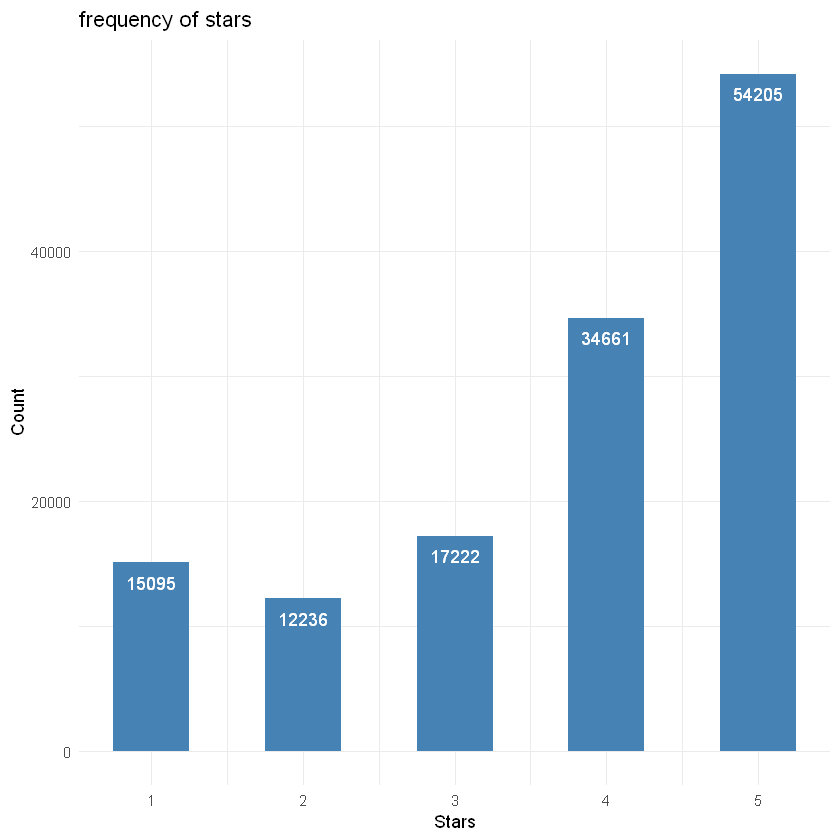

In [13]:
library(ggplot2)

ggplot(restaurant_reviews, aes(x=stars))+
  geom_bar(stat="bin", bins= 9, fill="steelblue") + 
  geom_text(stat='count', aes(label=..count..), vjust=1.9, color="white") +
  ggtitle("frequency of stars") +
  xlab("Stars") + ylab("Count") +
  theme_minimal()


\
From the plot is clear that the reviews tend to be good, so they give 4 or 5 stars, this could be a problem during the training of the neural network because it could start to assign all the revies as good and still reaches a good accurancy since most reviews will be good, so for the training in session  5 I will use an equal number of good and bad reviews.
Since the large dimension of the dataset, it could be resonable to think that not all the reviews are in english, so I could try to invistigate that:\

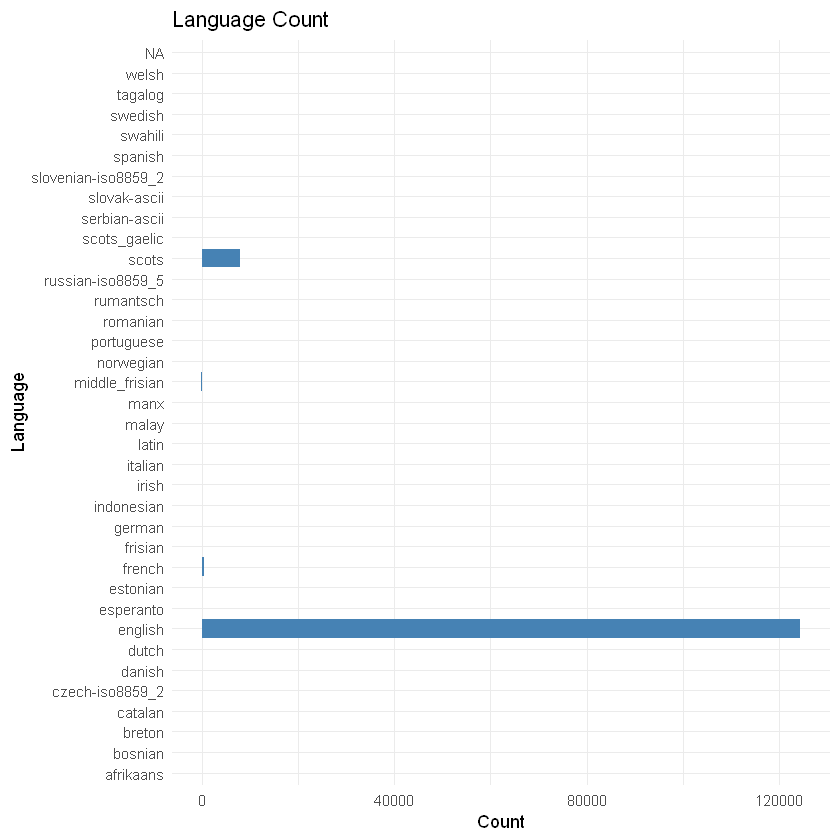

In [14]:

library(textcat)
#keep only english reviews
restaurant_reviews$language <- textcat(restaurant_reviews$text)

ggplot(restaurant_reviews, aes(x=language))+
  geom_bar(stat="count", fill="steelblue") + 
  ggtitle("Language Count") +
  xlab("Language") + ylab("Count") +
  theme_minimal() + coord_flip()

#we have keep only the english sentences
restaurant_reviews <- restaurant_reviews %>% filter(language =='english' | language =='scots')


As expected not all reviews are in english, there are also french reviews and scots reviews.
I add a new variable that indicates the language use in each review, and then I filter in order to keep only english and scots reviews (scots maybe is for scotshis but still english).

# EXPLORE THE REVIEWS

In this section I explore some characteristics of the dataset, that help understand better the distribution of word and sentiment across different reviews.
Now I substitute the variable stars with the variable sentiment, so bad =1 or 2 stars, neutral = 3 stars, and good = 4 or 5 stars (here I divided into 3 group while for the classification I will only use 2 of them).

In [46]:
library(tidyverse)
library(tidytext)
library(tm)
library(stopwords)
library(hunspell)
library(textstem)

In [16]:
restaurant_reviews <- restaurant_reviews %>%
  mutate(sentiment = case_when(stars <3 ~ 'bad',
                             stars == 3 ~ 'neutral', 
                             stars > 3 ~ 'good') 
  )

doc_rev<- restaurant_reviews %>%
  select(business_id,text, sentiment)
head(doc_rev)

business_id,text,sentiment
<chr>,<chr>,<chr>
HQl28KMwrEKHqhFrrDqVNQ,"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",good
5JxlZaqCnk1MnbgRirs40Q,"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop; Mumbly, unengaged waiter; Clueless manager, who seeing us with barely nibbled entrees on plates shoved forward for pickup, thanked us perfunctorily for our patronage; We're from the Texas Hill Country; down there, we jail critters who serve up grub this bad, for their own protection. Never, never, NEVER again (Back to Yard House for real food)",bad
IS4cv902ykd8wj1TR0N3-A,"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The cashiers are pleasant and as far as food wise i have yet to receive any funky chicken. The clean up crew zips around the dining area constantly so it's usually well kept. My only gripe is the one fella with Red hair he makes the rounds while cleaning but no smile or personality a few nights ago he tossed the napkins i just put on the table to help go with my meal. After I was done he just reached for my tray no ""excuse me or are you done with that?"" I realize he's trying to do his job quickly but a little table manners goes along way. That being said still like to grub here and glad that there's finally a Cane's close to me.",good
nlxHRv1zXGT0c0K51q3jDg,"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I see and taste here tells me that they're using top-grade fresh ingredients. The brisket sandwich is probably my favorite... and it's the one my wife ALWAYS gets. Unlike her, I often bounce around the menu to try different things. Definitely a step up from Subway, Quiznos, Jimmy Johns, etc in my opinion. As with all of my reviews, I grade each place relative to what I perceive to be its peers - so five star compared to them.",good
Pthe4qk5xh4n-ef-9bvMSg,"Really good place with simple decor, amazing food and great hospitality. Very impressed with the lunch portion. Although service took little extra time but I have no complaints since they are quite new in business. The green curry chicken was good and to the right spice balance I asked for. I will definitely recommend this place to others.",good
e_BiI4ej1CW1F0EyVLr-FQ,"Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The setting is cozy and a perfect spot for VD, anniversaries, or a special date. They'll make you feel like you're in Italy.",good


First I create a long document(a word for each row), so I tokenize by word:


In [17]:
#some example of long document and different filter
docs_long <- doc_rev %>% 
  unnest_tokens(word, 
                text) 

Now I start cleaning and remuve all the common words, the numbers and the word made by only 1 letter, then I apply lemmization:

In [18]:
docs_long <- doc_rev %>% 
  unnest_tokens(word, text) %>% # tokanize
  filter(str_length(word) > 1) %>% # let's delete all 1 letter entities
  filter(!str_detect(word, '[0-9]')) %>% # let's delete all numbers
  anti_join(stop_words, by = 'word')  #then delete all stopword with nati_join

#lemmization
docs_long <- docs_long %>%
  mutate(word2 = lemmatize_words(word)) %>% 
  mutate(word2 = sapply(word2, function(x) x[1])) %>% 
  filter(!word2=='food')
head(docs_long,3)
word_tokens <- docs_long %>% 
  select(word2,sentiment) 
word_tokens

business_id,sentiment,word,word2
<chr>,<chr>,<chr>,<chr>
HQl28KMwrEKHqhFrrDqVNQ,good,love,love
HQl28KMwrEKHqhFrrDqVNQ,good,deagan's,deagan's
HQl28KMwrEKHqhFrrDqVNQ,good,atmosphere,atmosphere


word2,sentiment
<chr>,<chr>
love,good
deagan's,good
atmosphere,good
cozy,good
festive,good
shrimp,good
tacos,good
house,good
fry,good


I investigate which are the most used words in all reviews, but before I also remove the word 'food' since is obviously going to be the most repeted word but it doesn't give any insight. 

In [19]:
top_word <- word_tokens %>% 
  count( word2) %>% 
  top_n(30,n) %>% 
  arrange(desc(n))
 
top_word

word2,n
<chr>,<int>
service,54083
time,52777
restaurant,36206
eat,31578
love,30481
chicken,28260
nice,25956
menu,25658
delicious,24471


We can also visualize this with some plots for example a wordcloud


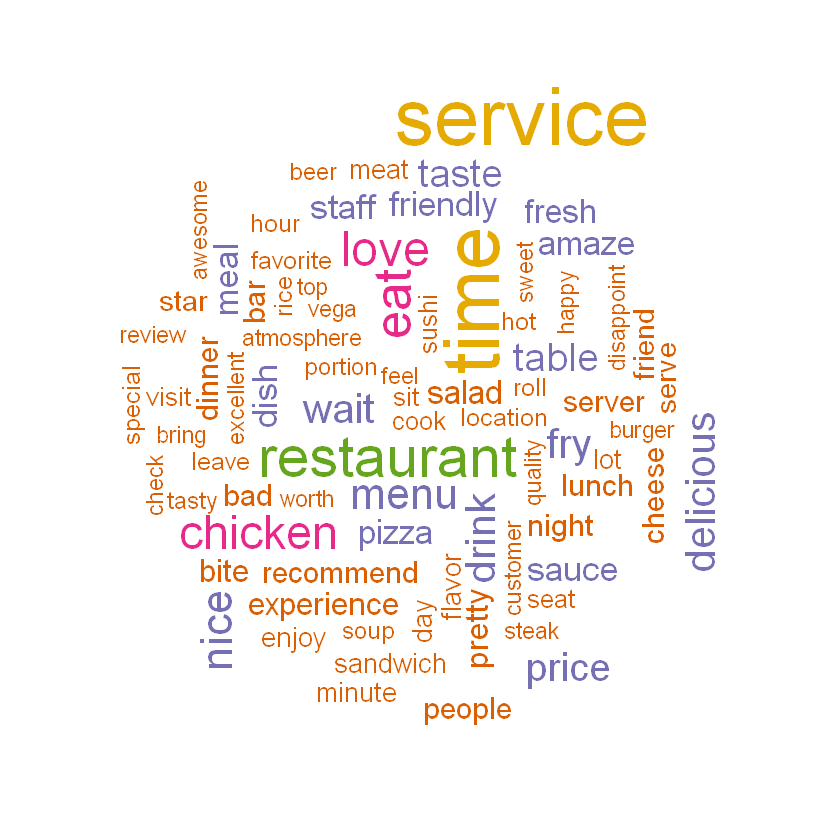

In [45]:

library(wordcloud)
library(ggwordcloud)
library(plotrix)
library(textstem)


word_count <- word_tokens %>% 
  count(word2)
wordcloud(word_count$word2, 
          word_count$n, max.words = 80, 
          rot.per = 0.35, colors = brewer.pal(6, "Dark2"))



A lot of word refer to food and restaurant and other are positive sentiment probably because there are more positive reviews but also because a positive word can be use in negative way by adding a negation before. I could try to clarify this doubt by plotting a wordcloud for each sentiment:


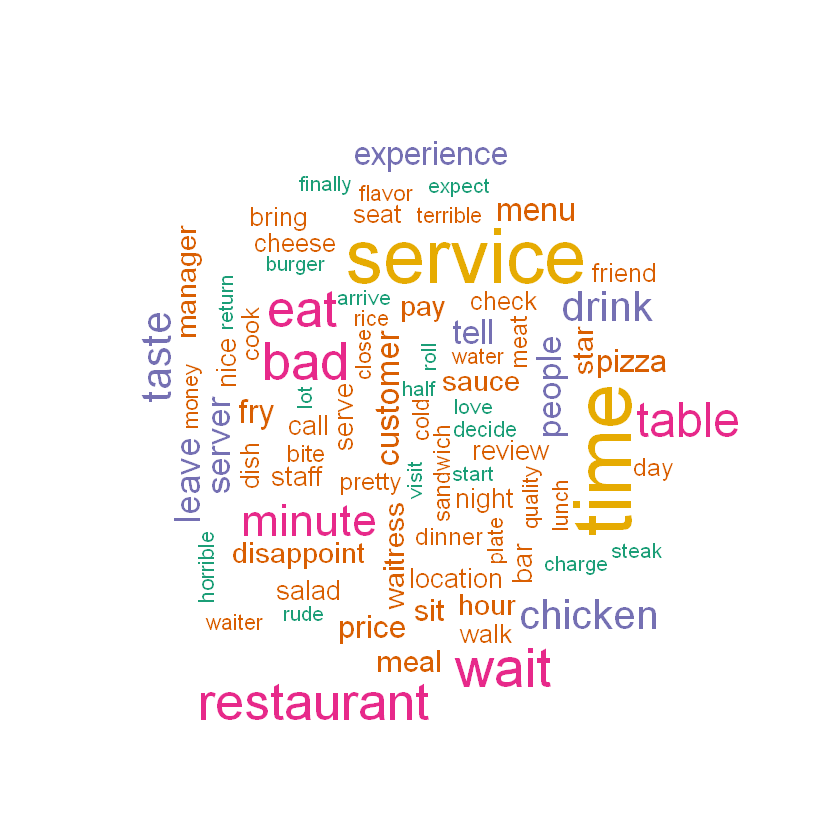

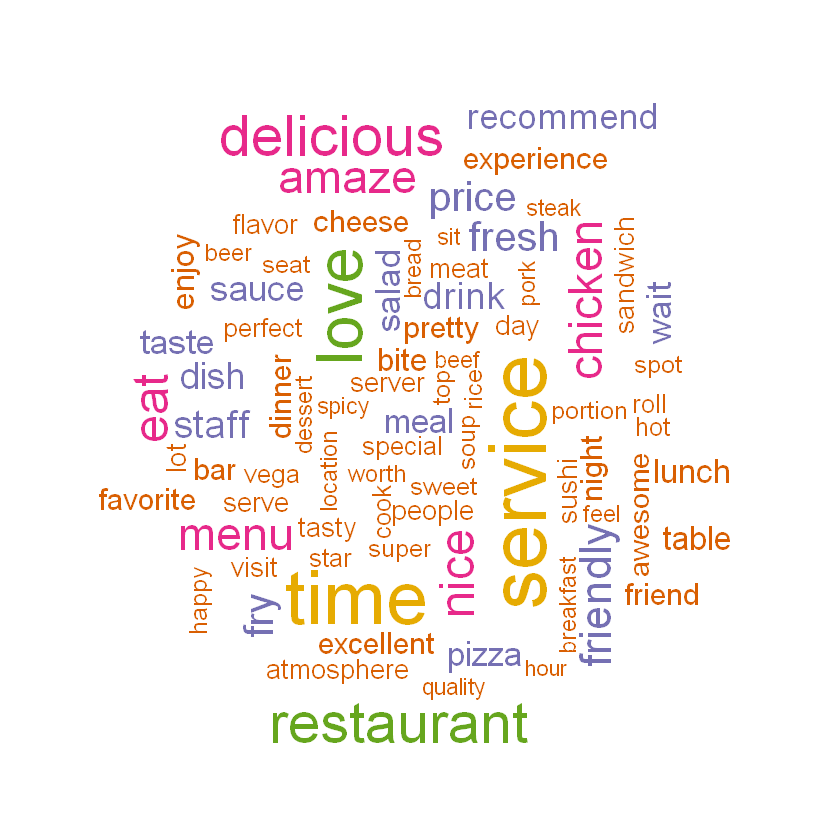

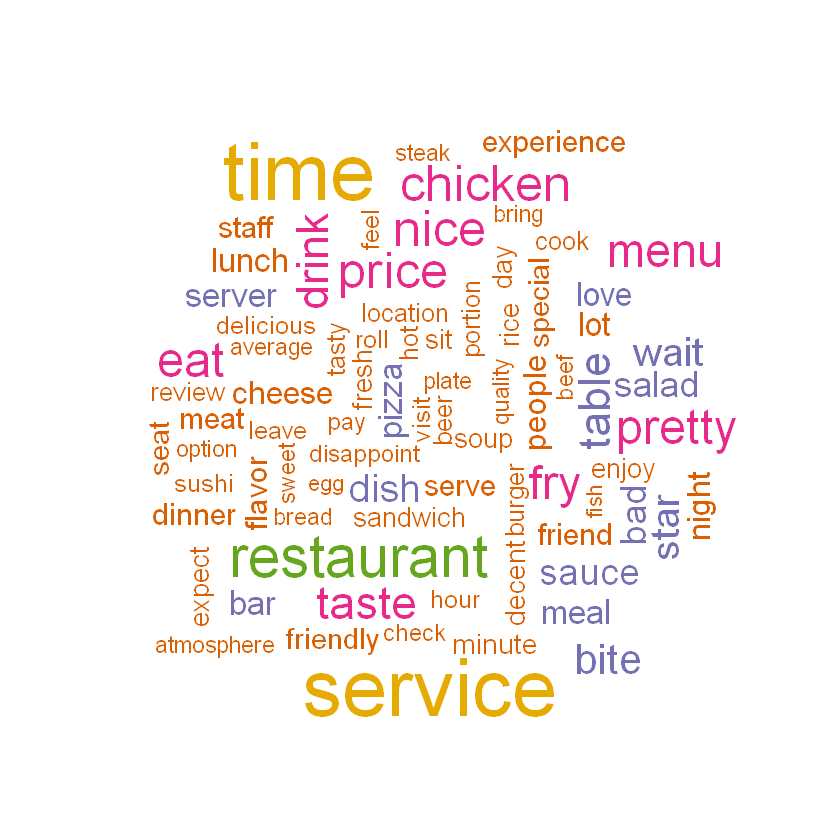

In [44]:

word_count <- word_tokens %>% 
  count(sentiment,word2) 
par(mar = c(0, 0, 0, 0), mfrow = c(1,1))
for (i in unique(word_count$sentiment)){
  word_sentiment <- filter(word_count, sentiment == i)
  wordcloud(word_sentiment$word2, word_sentiment$n, max.words = 80,
            rot.per = 0.35, colors = brewer.pal(6, "Dark2"))}

Now there is a clearer view of the distribution of the words: in the bad sentiment there are not positive words, among the most used, instead there are words releted to the waiting time as 'wait', 'minute' and also the words 'bad' and 'leave', while in the 'neutral' wordcloud there aren't positive or negative sentiments, but service and time appear a lot. In the wordcloud 'good' there are a lot of good adjectives for the food, as 'delicious, enjoy, fresh'.
We can use another type of plot to see the difference in the words most used for each type of reviews:

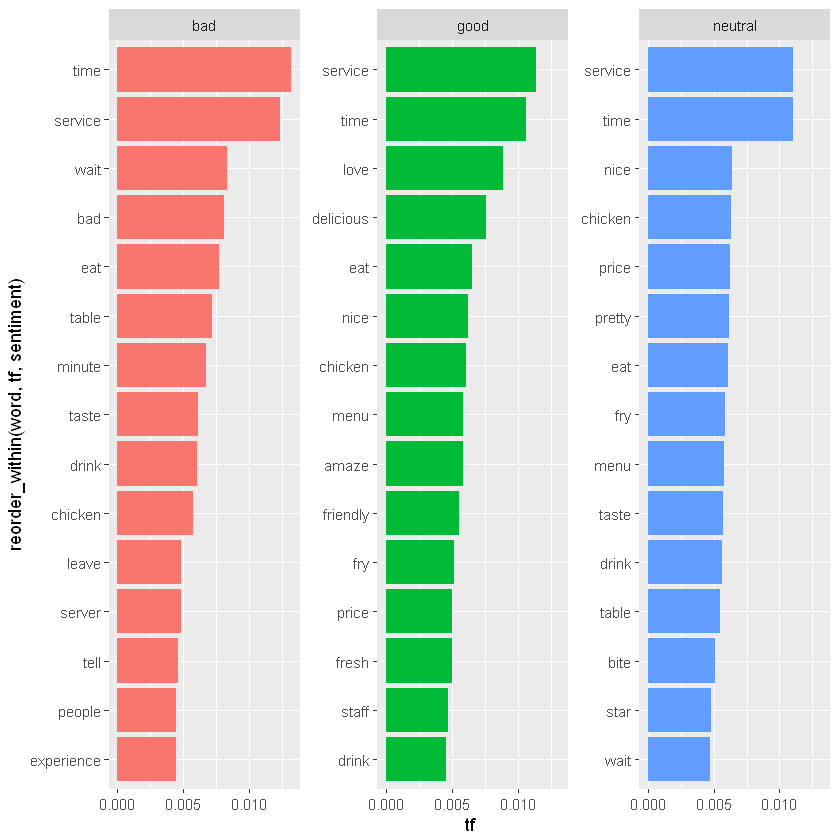

In [22]:
word_top <- word_tokens %>% 
    count(sentiment, word2, sort = T) %>% 
    filter(!word2 %in% c('food','restaurant')) %>%
    bind_tf_idf(word2, sentiment, n) %>%
    group_by(sentiment) %>% 
    top_n(15, tf) %>% 
    ungroup() %>% 
    mutate(word = reorder(word2, tf))

ggplot(word_top, aes(x = reorder_within(word, tf, sentiment), y = tf, fill =sentiment)) +
    geom_col(show.legend = F) +
    coord_flip() +
    facet_wrap(~ sentiment, scales ="free_y" ) +
    scale_x_reordered() #reordering with

In the plot as weight instead of use the number of time a word is used, I used the total frequency, since there are different number of positive, negative and neutral reviews.
Now I start compare only good and bad reviews, since they will be the objective of my binary classification.
To visualize the most common word between bad and good reviews I use a comonality plot, then I use also a comparison plot to show the most common words between this very different reviews' sentiment, but also the differences :

Warning message in brewer.pal(ncol(corpora), "Set1"):
"minimal value for n is 3, returning requested palette with 3 different levels
"


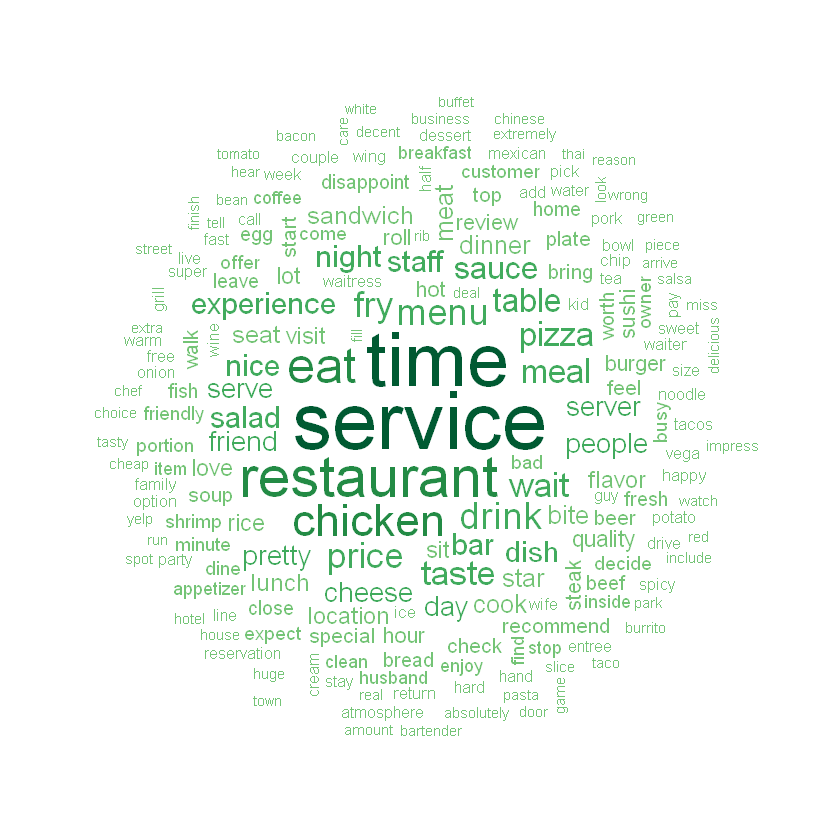

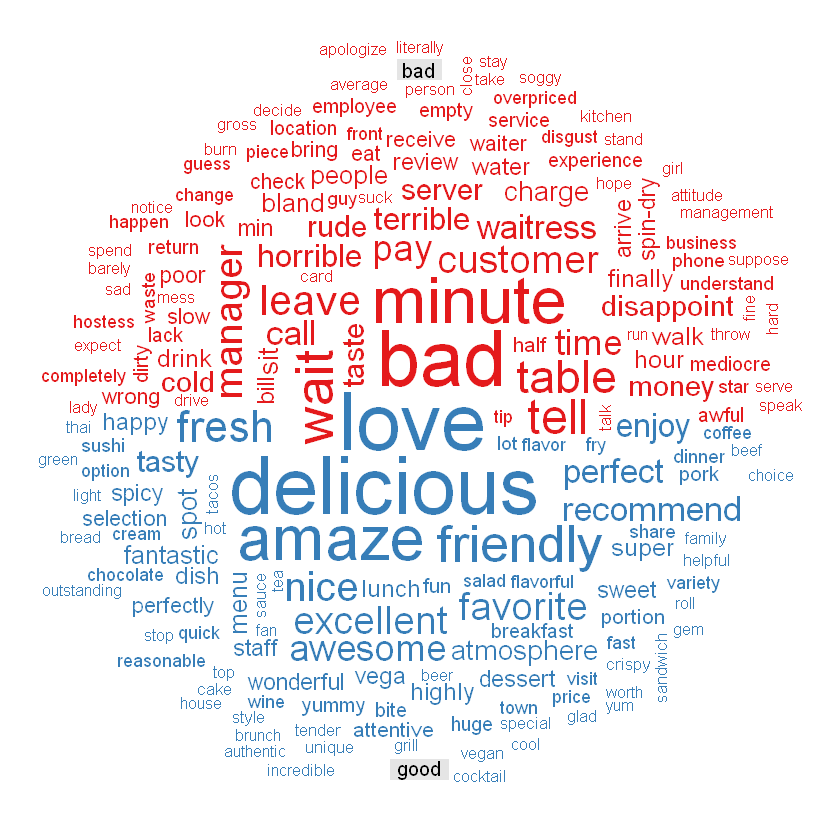

In [23]:
#divide good and bad reviews
word_count_good <- word_tokens %>% 
  filter(sentiment=='good') %>% 
  group_by(word2,sentiment) %>% 
  count() %>% 
  bind_tf_idf(word2, sentiment, n) %>% 
  select(word2,sentiment,n)

word_count_bad <- word_tokens %>% 
  filter(sentiment=='bad') %>% 
  group_by(word2,sentiment) %>% 
  count() %>% 
  bind_tf_idf(word2, sentiment, n) %>% 
  select(word2,sentiment,n)

corpora <- bind_rows(word_count_good, word_count_bad) %>% 
  spread(sentiment, n, fill = 0) %>% 
  column_to_rownames("word2") %>% 
  as.matrix()

pal <- brewer.pal(8, "Greens")
pal <- pal[-(1:4)]
par(mar = c(0, 0, 0, 0), mfrow = c(1,1))

commonality.cloud(corpora, 
                  max.words = 200, 
                  random.order = FALSE,
                  colors = pal)

comparison.cloud(corpora, 
                 max.words = 200, 
                 random.order = FALSE, 
                 title.size = 1.0, 
                 colors = brewer.pal(ncol(corpora),'Set1'))

Now I wuold like to see the common words that are use a lot in one type of reviews and  very few in the other, and a pyramid plot is perfect for this :

32906 32906 


[1] 5.1 4.1 4.1 2.1

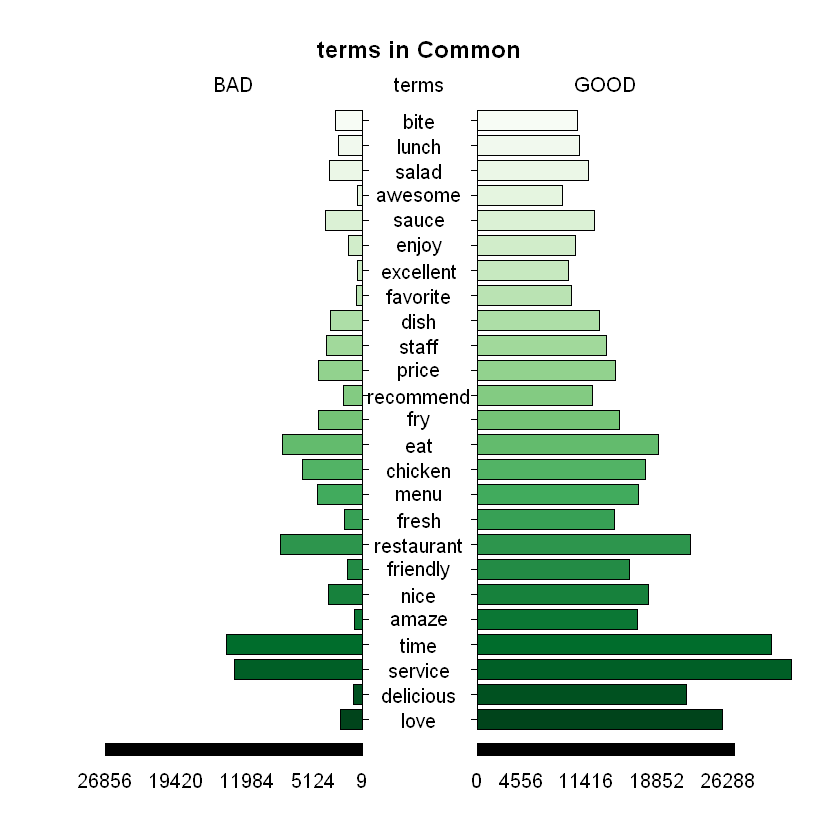

In [24]:
common.terms <- subset(corpora, corpora[, 1] > 0 & corpora[, 2] > 0)

diff <- abs(common.terms[, 1] - common.terms[, 2])
common.terms <- cbind(common.terms, diff)
common.terms <- common.terms[order(common.terms[, 3], decreasing = T), ]
df <- data.frame(x = common.terms[1:25, 1], 
                 y = common.terms[1:25, 2],
                 labels = rownames(common.terms)[1:25]
)

colours <- colorRampPalette(brewer.pal(9,'Greens'))(25)
colours <- rev(colours)

#plot

pyramid.plot(df$x, df$y,
             labels = df$labels, # labels in the middle
             gap = 6050, # size of gap between bars
             top.labels = c("BAD", "terms", "GOOD"), # labels
             main = "terms in Common", 
             lxcol = colours, rxcol = colours, # colors
             laxlab = NULL, raxlab = NULL, unit = NULL)

We can see clearly the difference in words used for good and bad reviews.

Untill now I look at single word, is not always usefull, so now I start to analysize bigrams of the reviews, for example , what word come after the word 'service' in the reviews:

In [25]:
library(widyr)
library(igraph)
library(ggraph)
library(janeaustenr)
library(gutenbergr)

Warning message:
"package 'widyr' was built under R version 3.6.3"
Warning message:
"package 'igraph' was built under R version 3.6.3"

Attaching package: 'igraph'


The following objects are masked from 'package:purrr':

    compose, simplify


The following object is masked from 'package:tidyr':

    crossing


The following object is masked from 'package:tibble':

    as_data_frame


The following objects are masked from 'package:dplyr':

    as_data_frame, groups, union


The following objects are masked from 'package:stats':

    decompose, spectrum


The following object is masked from 'package:base':

    union


Warning message:
"package 'ggraph' was built under R version 3.6.3"
Warning message:
"package 'janeaustenr' was built under R version 3.6.3"
Warning message:
"package 'gutenbergr' was built under R version 3.6.3"


In [26]:
restaurant_reviews <- restaurant_reviews %>% 
  select(text,sentiment)

bigrams <- restaurant_reviews %>% 
  unnest_tokens(bigram, text, token = 'ngrams', n = 2)

new_bigrams <- bigrams %>% 
  separate(bigram, c('c1', 'c2'), sep = " " ) # splitting bigrams into 2 columns

filtered_bigrams <- new_bigrams %>% 
  filter(!c1 %in% stop_words$word) %>% # removing stop words from the first column
  filter(!c2 %in% stop_words$word)

# Let's count the most frequent bigrams again:
bigram_counts <- filtered_bigrams %>% 
  count(c1, c2, sort = TRUE)

# Now we can combine the columns back into one:
bigrams_united <- filtered_bigrams %>% 
  unite(bigram, c1, c2, sep = " ") 
 

filtered_bigrams %>% # because we will analyze the separated columns without the stop words
  filter(c1 == 'service') %>%
  count(sentiment, c2, sort = TRUE) 

sentiment,c2,n
<chr>,<chr>,<int>
good,food,257
good,excellent,117
good,friendly,114
good,staff,94
bad,sucks,86
good,5,86
bad,food,84
good,nice,81
bad,industry,72



and what words come before :

In [27]:
filtered_bigrams %>% # because we will analyze the separated columns without the stop words
  filter(c2 == 'service') %>%
  count(sentiment, c1, sort = TRUE) 

sentiment,c1,n
<chr>,<chr>,<int>
good,customer,2241
bad,customer,1743
good,friendly,1017
good,excellent,796
good,fast,423
good,food,406
neutral,customer,371
good,amazing,367
bad,horrible,362


Now we can see that in good reviews the word service is usually followed or preceded by a positive adjective, while for bad reviews, service is followed or preceded by a negative adjective, the same thing can be observed for the word food and the adjective that follow it:

In [28]:

filtered_bigrams %>% # because we will analyze the separated columns without the stop words
  filter(c1 == 'food') %>% 
  count(sentiment, c2, sort = TRUE) 

sentiment,c2,n
<chr>,<chr>,<int>
good,service,406
good,quality,356
bad,poisoning,274
bad,quality,242
good,court,235
good,options,156
bad,arrived,150
good,truck,144
good,arrived,140



It makes sense now to show the most used (top 8) bigrams in each type of revies, using tf_idf weight:

sentiment,bigram,n,tf,idf,tf_idf
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
bad,negative stars,69,2.049357e-04,1.0986123,2.251449e-04
bad,worst restaurant,55,1.633545e-04,1.0986123,1.794633e-04
bad,horrible horrible,50,1.485041e-04,1.0986123,1.631484e-04
neutral,giving 3,31,1.293591e-04,1.0986123,1.421155e-04
bad,worst chinese,31,9.207255e-05,1.0986123,1.011520e-04
bad,worst food,79,2.346365e-04,0.4054651,9.513692e-05
bad,terrible customer,74,2.197861e-04,0.4054651,8.911559e-05
bad,limitword limitword,26,7.722214e-05,1.0986123,8.483719e-05
bad,hate giving,23,6.831189e-05,1.0986123,7.504829e-05


Selecting by tf_idf



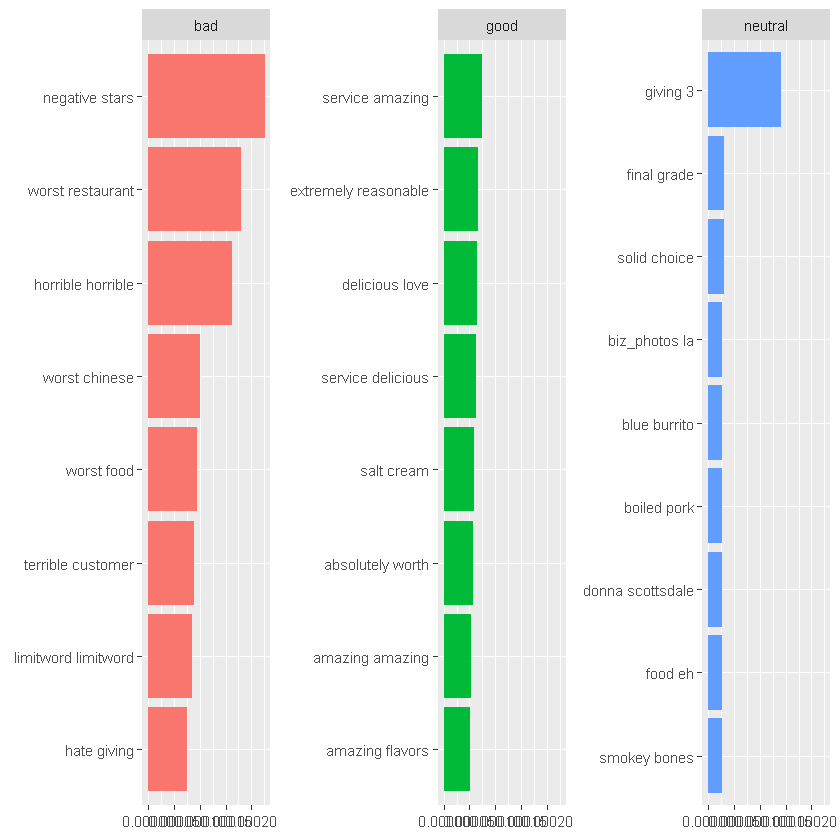

In [29]:
bigram_tfidf <- bigrams_united %>% # we analyze bigrams without stopwords
  count(sentiment,bigram) %>% 
  bind_tf_idf(bigram, sentiment, n) %>% # calculates the values and binds them as columns
  arrange(desc(tf_idf)) 
bigram_tfidf


bigram_top8<- bigram_tfidf %>% 
  arrange(desc(tf_idf)) %>% # first we have to arrange them in the descending order
  mutate(bigram = factor(bigram, levels = rev(unique(bigram)))) %>% 
  group_by(sentiment) %>% 
  top_n(8) %>% 
  ungroup
ggplot(data = bigram_top8, aes(bigram, tf_idf, fill = sentiment)) +  
  geom_col(show.legend = FALSE) + 
  labs(x = NULL, y = NULL) + # to label the axes, in our case we will flip them, so you will see tf-idf at
  facet_wrap(~sentiment, ncol = 3, scales = "free_y") + # to arrange the results
  coord_flip() # to flip the axis, the vertical plot becomes horizontal




This last plot is very usefull to understand the different words used in the different types of reviews highlighted in this section. Good and bad reviews has clear adjectives and words that show their sentimen, while for neutral reviews is more difficult, they usually don't express extreme opinion on the restaurant or the food. 

# BINARY CLASSIFICATION WITH DEEP NEURAL NETWORKS

In this section I will use DL-model to classify the reviews in good or bad.
For the classification model I select more reviews than the sections before and I remove all neutral ones. In order to have a balance classifier I select an equal number of good and bad reviews for the training set with 20000 reviews for each type. For the test set instead I try to reflect more the real dataset, where there are more good reviews than bad, so it will count a total of 15000 reviews select at random, but 10000 will be of sentiment good and only 5000 of sentiment bad. Then the training set itsel, is divided in training and validation set (training=28000, validation=12000).
All the reviews have been subjected to a text cleaning procedure,I remove number, stopword and puntaction.
Before fitting the model I tokenize the word,keep only the 20000 more used, and use only the first 50 words in the reviews. The batch size is 32 for all models, and the have the same loss function: the binary cross entropy loss. Since the models train on a lot of data I use only 3-4 epochs for the training.

###  DATA PREPARATION

In [41]:
library(keras)

In [32]:
review <-  restaurant_reviews %>%
  select(text, sentiment)

good_reviews <- review %>%
  filter(sentiment=='good') %>% 
  select(text,sentiment)
head(good_reviews)
nrow(good_reviews)
bad_reviews <- review %>%
  filter(sentiment=='bad') %>% 
  select(text,sentiment)
head(bad_reviews)
nrow(bad_reviews)

review <- rbind(good_reviews[1:25000,],bad_reviews[1:25000,],good_reviews[25001:30000,])

#prepare train&test data
data <- review %>% 
  select(text,sentiment) %>% 
  mutate(label = ifelse(sentiment=='good',1,0))
text <- as.vector(data$text)   
label <- as.vector(data$label)
length(label)
#clean the reviews without using a long document
dfCorpus <- Corpus(VectorSource(text))
clean.corpus <- function(corpus){
  corpus <- tm_map(corpus, content_transformer(tolower))
  corpus <- tm_map(corpus, removeWords, stopwords('en'))
  corpus <- tm_map(corpus, removePunctuation)
  corpus <- tm_map(corpus, removeNumbers)
  corpus <- tm_map(corpus, stripWhitespace)
  corpus <- tm_map(corpus, content_transformer(lemmatize_strings))
  return(corpus)
}
dfCorpus <-  clean.corpus(dfCorpus)

df <- data.frame(text = sapply(dfCorpus, function(x) x),
                 stringsAsFactors = F)
text <- df$text
head(text)

text,sentiment
<chr>,<chr>
"I love Deagan's. I do. I really do. The atmosphere is cozy and festive. The shrimp tacos and house fries are my standbys. The fries are sometimes good and sometimes great, and the spicy dipping sauce they come with is to die for. The beer list is amazing and the cocktails are great. The prices are mid-level, so it's not a cheap dive you can go to every week, but rather a treat when you do. Try it out. You won't be disappointed!",good
"Oh happy day, finally have a Canes near my casa. Yes just as others are griping about the Drive thru is packed just like most of the other canes in the area but I like to go sit down to enjoy my chicken. The cashiers are pleasant and as far as food wise i have yet to receive any funky chicken. The clean up crew zips around the dining area constantly so it's usually well kept. My only gripe is the one fella with Red hair he makes the rounds while cleaning but no smile or personality a few nights ago he tossed the napkins i just put on the table to help go with my meal. After I was done he just reached for my tray no ""excuse me or are you done with that?"" I realize he's trying to do his job quickly but a little table manners goes along way. That being said still like to grub here and glad that there's finally a Cane's close to me.",good
"This is definitely my favorite fast food sub shop. Ingredients are everything, and everything I see and taste here tells me that they're using top-grade fresh ingredients. The brisket sandwich is probably my favorite... and it's the one my wife ALWAYS gets. Unlike her, I often bounce around the menu to try different things. Definitely a step up from Subway, Quiznos, Jimmy Johns, etc in my opinion. As with all of my reviews, I grade each place relative to what I perceive to be its peers - so five star compared to them.",good
"Really good place with simple decor, amazing food and great hospitality. Very impressed with the lunch portion. Although service took little extra time but I have no complaints since they are quite new in business. The green curry chicken was good and to the right spice balance I asked for. I will definitely recommend this place to others.",good
"Most delicious authentic Italian I've had in the US. You wouldn't leave this place unhappy. The setting is cozy and a perfect spot for VD, anniversaries, or a special date. They'll make you feel like you're in Italy.",good
"I have been here twice. Very nice and laid back. I tried the weekend Southern menu and it was delicious! Collard greens, mac&cheese, ribs, BBQ chicken sandwich. The scone with clotted cream was divine!!!! The iced teas are very refreshing and I swear I drank a whole container myself both visits. The second time I had soup, salad and a sandwich. The salad had this amazing (raspberry? strawberry?, I forgot) vinaigrette. The sandwich was good, but I was kind of disappointed with the soup. It was potato and tasted too ""milky"". They change the menu often and now have a tea inspired one. Can't wait to go back and try it. The owners are very nice and I hope they continue to do well.",good


[1] 88117

text,sentiment
<chr>,<chr>
"Dismal, lukewarm, defrosted-tasting ""TexMex"" glop; Mumbly, unengaged waiter; Clueless manager, who seeing us with barely nibbled entrees on plates shoved forward for pickup, thanked us perfunctorily for our patronage; We're from the Texas Hill Country; down there, we jail critters who serve up grub this bad, for their own protection. Never, never, NEVER again (Back to Yard House for real food)",bad
"10pm on a super bowl Sunday and they're already closed?? Weak, no wonder the hard Rock is dying off...",bad
"Just... not good. We want it to be - we have been several times hoping, but the experience is always at best, lackluster. The food is not great, very run-of the mill on a good day and the serve staff though very nice is always - and I have never had the same person twice - always totally lost and under-trained. It blows my mind because they can't possibly know alcohol laws if they don't know anything about the menu - going to bite that company one day. I am not sure but I think someone I know told me they do the shared tip thing and I thought maybe that may be why but I know another place that does that and the service is excellent. I don't know what the problem is - I have worked in the industry before while in college and I would say front of the house training needs big overhaul. At any rate, they have lots of TV's and it is closer to us but just plain not good. I wish they would switch locations with Wild Wing Cafe - also chain-y but much better food and service.",bad
"This actually used to be one of my favorite hotel/casinos back in the day. Oh, how things have changed. There are some goods, however. If you are a conventioneer, you have instant and direct walking access to the main convention center. But don't think about parking here for said conventions. $30 a day for parking, Hilton? Seriously? That's robbery. And greed. The biggest disappointment is the killing off of Star Trek: The Experience over two years ago. Despite this place being off-Strip, I made it a point to go here because they had such a fun and unique attraction here. It would be one thing if they had something in mind to replace it, but either poor planning or the economy.... It's dead, Jim. The ""Space Lounge"" is still there. An entire casino area with a heavy sci-fi theme to it. Except there's no casino here. It's a huge space themed area with a ghost town bar, no slots, a few couches, a makeshift stage, beer signs, and a few remnants of Star Trek themes. All of this space, and nothing. No life to it. Couches and beer signs only make the emptiness and waste of the area seem more empty and pathetic. With their main draw gone, what has replaced it as the headliner? Benihana's. Nothing wrong with the restaurant, but it's hardly unique or exclusive, even in Vegas. The Hilton has a Pizza Hut Express here too. Maybe they should promote that as their ""big draw"" on the marquee as well. A huge Benihana sign covers up the old entrance to Star Trek. With couches pushed in front of the entryway. Again, just sad, and I'll be a big man in saying that they kind of broke my heart getting rid of one of my most beloved hang-outs here. The arcade is dead as well. Another blanketed off space that sits and collects dust. Again, with two-plus years, no suitable replacement has been found for anything in this section. A few shops that fluctuate, but that's it. This is a lot of dead space to go unused. There's also the issue of the Men's bathroom in the main casino area. Above every urinal is a picture of a lust-crazed girl staring over your bits with a camera, magnifying glass, tape measure, etc, while you pee. The first time I saw this, it was ""ha ha"" funny, then when the laughter died, it just turned creepy and weird for me. I actually selected a urinal based off which girl creeped me out the least. She merely looked like she was casting spells at my nethers. I could live with that. Ladies: I must know. Is there something like this in 

[1] 27194

[1] 55000

Warning message in tm_map.SimpleCorpus(corpus, content_transformer(tolower)):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("en")):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, stripWhitespace):
"transformation drops documents"
Warning message in tm_map.SimpleCorpus(corpus, content_transformer(lemmatize_strings)):
"transformation drops documents"


[1] "love deagans really atmosphere cozy festive shrimp tacos house fry standby fry sometimes good sometimes great spicy dip sauce come die beer list amaze cocktail great price midlevel cheap diva can go every week rather treat try disappoint"                                                                                                                                                                                                                                               
[2] "oh happy day finally cane near casa yes just other gripe drive thru pack just like cane area like go sit enjoy chicken cashier pleasant far food wise yet receive funky chicken clean crow zip around dine area constantly usually good keep gripe one fella red hair make round clean smile personality night ago toss napkin just put table help go meal do just reach tray excuse do realize try job quickly little table manner go along way say still like grub glad finally cane close"
[3] "definitely favorite fast food sub shop ingredient everything everything see taste tell use topgrade fresh ingredient brisket sandwich probably favorite one wife always get unlike often bounce around menu try different thing definitely step subway quiznos jimmy johns etc opinion review grade place relative perceive peer five star compare"                                                                                                                                          
[4] "really good place simple decor amaze food great hospitality impress lunch portion although service take little extra time complaint since quite new business green curry chicken good right spice balance ask definitely recommend place other"                                                                                                                                                                                                                                              
[5] "delicious authentic italian us leave place unhappy set cozy perfect spot vd anniversary special date make feel like italy"                                                                                                                                                                                                                                                                                                                                                                   
[6] "twice nice lay back try weekend southern menu delicious collard green maccheese rib bbq chicken sandwich scone clot cream divine ice tea refresh swear drink whole container visit 2 time soup salad sandwich salad amaze raspberry strawberry forget vinaigrette sandwich good kind disappoint soup potato taste milky change menu often now tea inspire one wait go back try owner nice hope continue good"

Since the neural network take only numeric vector as input I have to tokenize my data


In [33]:
training_samples <- 40000
test_samples  <- 15000
max_feature <- 20000
maxlen <- 50
batch_size <- 32

tokenizer <- text_tokenizer(num_words = max_feature) %>%
  fit_text_tokenizer(text)
sequences <- texts_to_sequences(tokenizer, text)
word_index = tokenizer$word_index

cat("Found", length(word_index), "unique tokens.\n")
data <- pad_sequences(sequences, maxlen = maxlen)

Found 49393 unique tokens.


Create trainint and test set:


In [35]:
#split in test,validation
indices <- sample(1:50000)
training_indices <- indices[1:40000]
test_indices <- indices[40001:50000]
x_train <- data[training_indices,]
y_train <- label[training_indices]
x_test <- data[test_indices,]
y_test <- label[test_indices]

#TEST SET:
#add more good reviews
x_test <- rbind(x_test,data[50001:55000,])
y_test <- c(y_test,label[50001:55000])
#reshaffle test set after adding more good reviews
test_indices <- sample(1:15000)
x_test <- x_test[test_indices,]
y_test <- y_test[test_indices]

### Model 1
The first model, the simplest is compose in the following way


Trained on 28,000 samples (batch_size=32, epochs=3)
Final epoch (plot to see history):
        loss: 0.06163
    accuracy: 0.9785
    val_loss: 0.3003
val_accuracy: 0.9054 

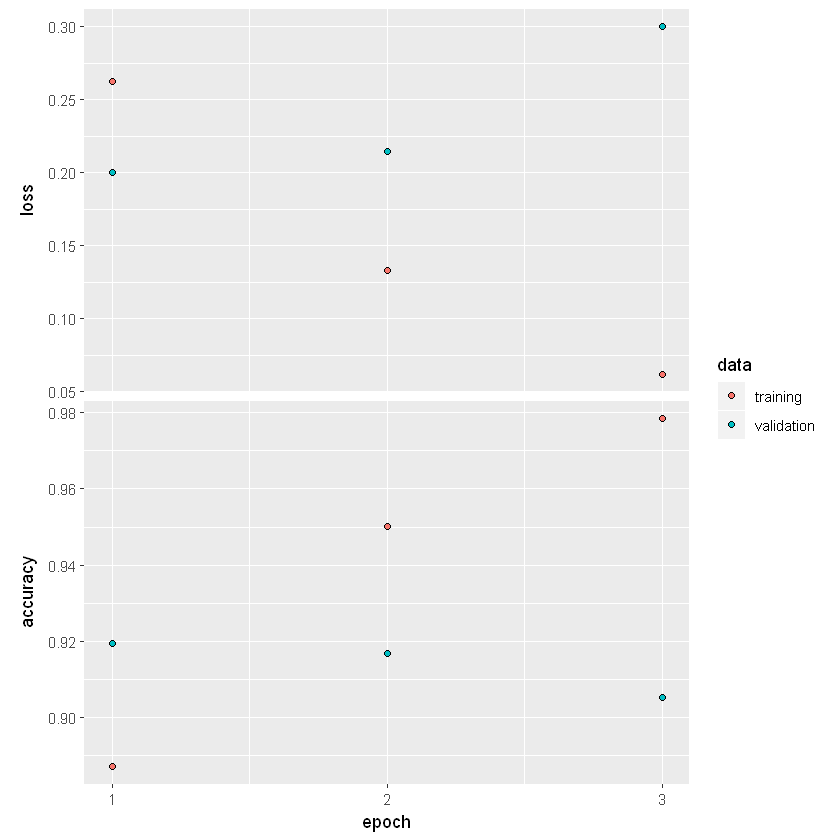

In [36]:
#model 1

model1 <- keras_model_sequential() %>%
  layer_embedding(input_dim = max_feature, output_dim = 100,
                  input_length = maxlen) %>%
  layer_flatten() %>%
  layer_dropout(0.2) %>% 
  layer_dense(units = 100, activation = "relu") %>%
  layer_dense(units = 1, activation = "sigmoid") %>% 
  compile(optimizer=optimizer_rmsprop(lr = 0.001,rho = 0.9), loss= 'binary_crossentropy', metrics   =  c('accuracy') )


history1 <- model1 %>% fit(
  x_train, y_train,
  epochs = 3,
  batch_size = 32,
  validation_split = 0.3
)
plot(history1)
history1

The results are good, it reach 90% accurancy in the validation set that is a very good result, higher than expected. 

### Model 2
In the second model instead of using a dense layer,I use an RNN layer to see if it get better results.
The training time is longer now. 

Trained on 28,000 samples (batch_size=32, epochs=3)
Final epoch (plot to see history):
        loss: 0.1913
    accuracy: 0.9301
    val_loss: 0.2243
val_accuracy: 0.9106 

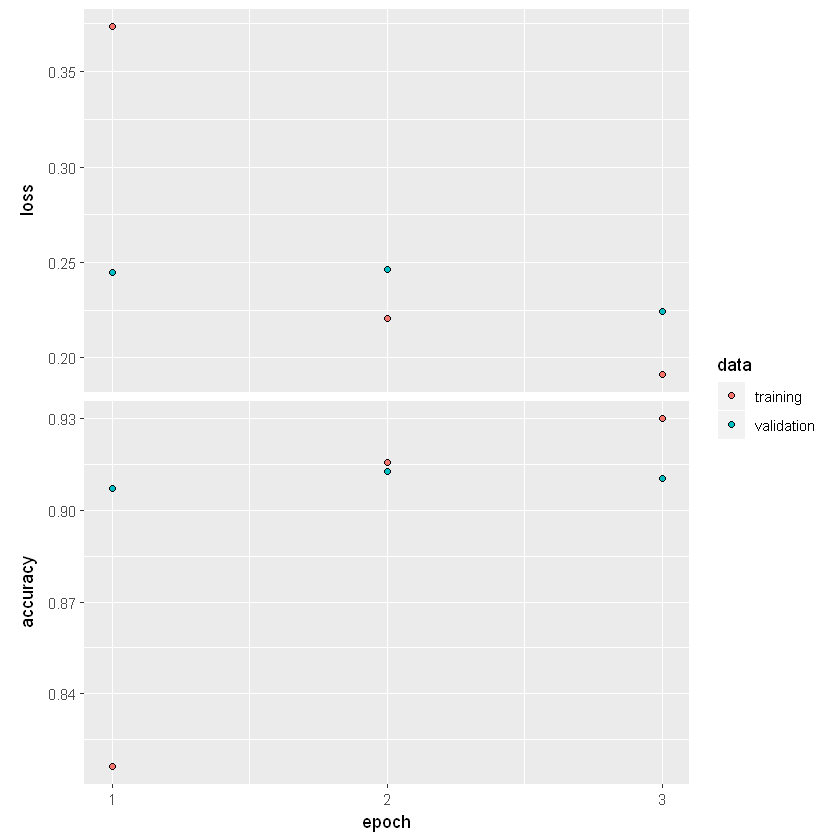

In [37]:
model2 <- keras_model_sequential() %>% 
  layer_embedding(input_dim = max_feature,output_dim = 100,input_length = maxlen) %>% 
  layer_simple_rnn(units=100,dropout = 0.2) %>% 
  layer_dense(units = 1,activation='sigmoid') %>% 
  compile(optimizer=optimizer_rmsprop(lr = 0.001,rho = 0.9), loss= 'binary_crossentropy', metrics   =  c('accuracy') )

history2 <- model2 %>% fit(
  x_train,y_train,
  epochs = 3,
  batch_size = 32,
  validation_split = 0.3
)
plot(history2)
history2

This model work better, it reaches as before about 90% accurancy in the validation set, and keep the loss lower than model 1 around 0.2. 

### Model 3
Now I improve again the model and use an LSTM layer instead of a simple RNN, as before the training time increase, and I add a dropout regolarization. 

Trained on 28,000 samples (batch_size=32, epochs=4)
Final epoch (plot to see history):
        loss: 0.1591
    accuracy: 0.9408
    val_loss: 0.1989
val_accuracy: 0.9268 

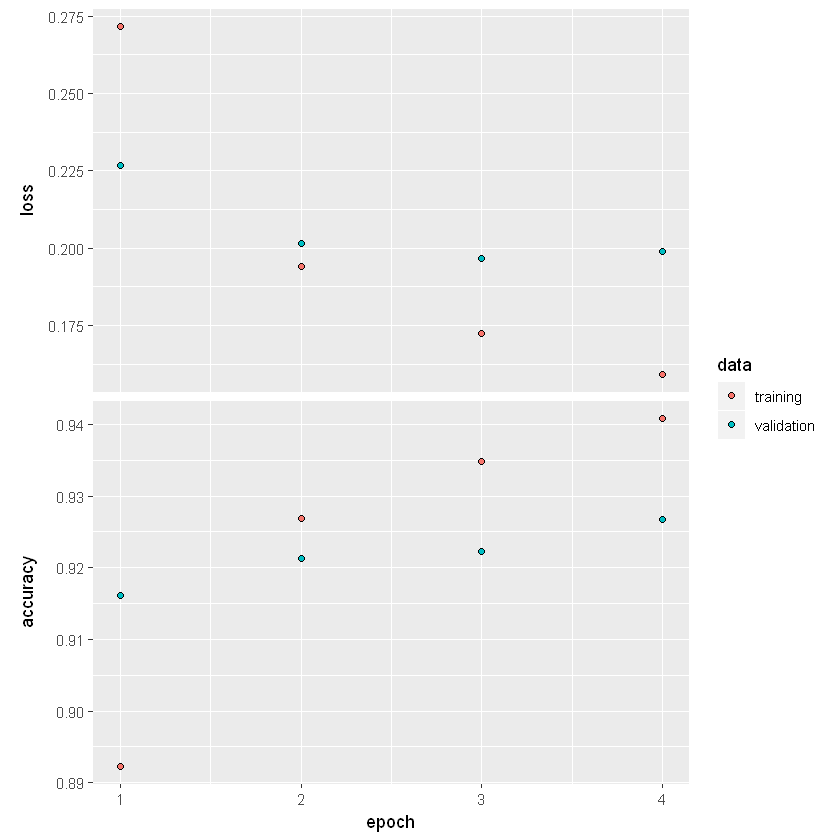

In [38]:
model3 <- keras_model_sequential() %>% 
  layer_embedding(input_dim = max_feature,output_dim = 100,input_length = maxlen) %>% 
  layer_lstm(units = 100, dropout = 0.2,recurrent_dropout = 0.2) %>% 
  layer_dense(units = 1,activation='sigmoid') %>% 
  compile(optimizer=optimizer_rmsprop(lr = 0.001,rho = 0.9), loss= 'binary_crossentropy', metrics   =  c('accuracy') )


history3 <- model3 %>% fit(
  x_train,y_train,
  epochs = 4,
  batch_size = 32,
  validation_split = 0.3
)
plot(history3)
history3


The LSTM model is the best for now, it achieves 92% accurancy in validation set and keep also the loss under 0.2 meaning that the error done in the classification are smaller than in previous model. The training time is increase since the complexity of the layers is also increase.


### Model 4 
To improve performance and speed training I add a 1D convolutional layer. It is helpful to think of this architecture as defining two sub-models: the CNN Model for feature extraction and the LSTM Model for interpreting the features across time steps.

Trained on 28,000 samples (batch_size=32, epochs=4)
Final epoch (plot to see history):
        loss: 0.1572
    accuracy: 0.9411
    val_loss: 0.2064
val_accuracy: 0.9208 

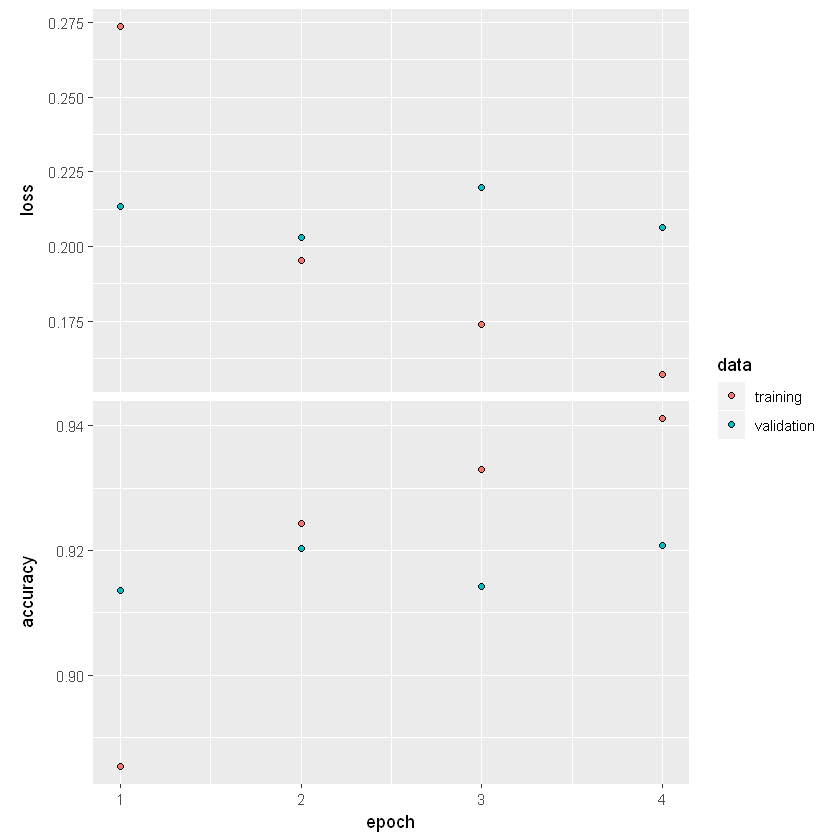

In [39]:

model4 <- keras_model_sequential() %>% 
  layer_embedding(input_dim = max_feature,output_dim = 100,input_length = 50) %>% 
  layer_dropout(0.2) %>% 
  layer_conv_1d(filters = 64, kernel_size = 5, activation = "relu") %>%
  layer_max_pooling_1d(pool_size = 4) %>%
  layer_lstm(units = 100, dropout = 0.2,recurrent_dropout = 0.2) %>% 
  layer_dense(units = 1,activation='sigmoid') %>% 
  compile(optimizer=optimizer_rmsprop(lr = 0.001,rho = 0.9), loss= 'binary_crossentropy', metrics   =  c('accuracy') )

history4 <- model4 %>% fit(
  x_train,y_train,
  epochs = 4,
  batch_size = 32,
  validation_split = 0.3
)
plot(history4)
history4

It work pretty much as model 3
### Testing 
Now I test all model on the test set

In [40]:
result1 <-model1 %>% evaluate(x_test,y_test)
result2 <-model2 %>% evaluate(x_test,y_test)
result4 <-model4 %>% evaluate(x_test,y_test)
result3 <-model3 %>% evaluate(x_test,y_test)
result1
result2
result3
result4

$loss
[1] 0.2835656

$accuracy
[1] 0.9145333

$loss
[1] 0.2162892

$accuracy
[1] 0.9154667

$loss
[1] 0.2126655

$accuracy
[1] 0.9248667

$loss
[1] 0.2083171

$accuracy
[1] 0.9188667


In this work I analyzed the restaurant reviews of the Yelp dataset, before I clean the reviews and explore them by word or bigram, then I use deep learning model to classify the reviews into 2 category good or bad. After train the  models and test them, the third model(lstm layer) perform best in term of accurancy.